# 선형회귀 - y = Wx+b꼴
## y=Wx 꼴과는 다르게 편향값이 추가되어, W를 스칼라가 아닌 벡터로 정의한다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

x와 y를 랜덤으로 정한다.

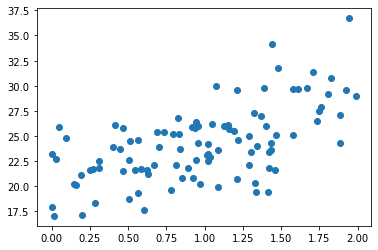

In [2]:
x = 2 * np.random.rand(100, 1)
y_train = 4*x + 3*np.random.randn(100, 1)+20
plt.scatter(x,y_train)
plt.show()

W를 2x1의 랜덤한 벡터로 초기화한다.
이때 W의 0번째 원소는 W의 1번째 원소는 편향이다

In [3]:
W = np.array([[random.random()], [random.random()]])
W.shape

(2, 1)

In [4]:
x

array([[1.60832961e+00],
       [1.62926202e-01],
       [1.46260369e+00],
       [1.42128964e+00],
       [1.21292055e+00],
       [5.07365190e-01],
       [1.32276776e+00],
       [6.71526862e-01],
       [9.20677355e-01],
       [9.25147481e-01],
       [1.44166030e+00],
       [1.74775538e+00],
       [9.38784834e-01],
       [2.85244045e-01],
       [1.08556529e+00],
       [1.28719651e+00],
       [1.20928790e+00],
       [2.71381004e-01],
       [1.02234117e+00],
       [1.28863610e+00],
       [1.43144873e+00],
       [1.99056908e+00],
       [3.43954106e-03],
       [4.75032025e-02],
       [1.47905589e+00],
       [1.03369589e+00],
       [1.85033106e-03],
       [1.19383873e+00],
       [2.88342521e-02],
       [1.66736880e+00],
       [5.67861074e-01],
       [9.22907338e-02],
       [1.95616271e-01],
       [7.80507917e-01],
       [1.88616705e+00],
       [7.91112344e-01],
       [4.13908183e-01],
       [1.48779433e-01],
       [9.41603865e-01],
       [9.58522695e-01],


In [5]:
x.shape

(100, 1)

In [6]:
np.ones(shape=(100,1)).shape

(100, 1)

x를 가중치 W와 행렬곱하기 편하도록 100x2꼴의 행렬로 바꾼다.
이때 편향값은 1과 곱해지므로 concatenate 명령어로 모든 x의 원소를 \[기존원소, 1]로 바꾼다

In [7]:
x_train = np.concatenate((x, np.ones(shape=(100,1))), -1)

In [8]:
x_train

array([[1.60832961e+00, 1.00000000e+00],
       [1.62926202e-01, 1.00000000e+00],
       [1.46260369e+00, 1.00000000e+00],
       [1.42128964e+00, 1.00000000e+00],
       [1.21292055e+00, 1.00000000e+00],
       [5.07365190e-01, 1.00000000e+00],
       [1.32276776e+00, 1.00000000e+00],
       [6.71526862e-01, 1.00000000e+00],
       [9.20677355e-01, 1.00000000e+00],
       [9.25147481e-01, 1.00000000e+00],
       [1.44166030e+00, 1.00000000e+00],
       [1.74775538e+00, 1.00000000e+00],
       [9.38784834e-01, 1.00000000e+00],
       [2.85244045e-01, 1.00000000e+00],
       [1.08556529e+00, 1.00000000e+00],
       [1.28719651e+00, 1.00000000e+00],
       [1.20928790e+00, 1.00000000e+00],
       [2.71381004e-01, 1.00000000e+00],
       [1.02234117e+00, 1.00000000e+00],
       [1.28863610e+00, 1.00000000e+00],
       [1.43144873e+00, 1.00000000e+00],
       [1.99056908e+00, 1.00000000e+00],
       [3.43954106e-03, 1.00000000e+00],
       [4.75032025e-02, 1.00000000e+00],
       [1.479055

In [9]:
y_train

array([[29.6443386 ],
       [20.17428994],
       [21.58389713],
       [21.78073651],
       [29.57339416],
       [22.57612212],
       [27.23552665],
       [22.15574173],
       [25.8655455 ],
       [20.79587603],
       [34.09346534],
       [27.45939061],
       [25.80367637],
       [18.35462612],
       [19.90670269],
       [22.13308556],
       [20.71893537],
       [21.69686001],
       [23.24729333],
       [24.98325611],
       [23.60916104],
       [29.01397013],
       [23.16686043],
       [25.9093978 ],
       [31.77774219],
       [22.92711855],
       [17.94486164],
       [25.52482477],
       [22.69712863],
       [29.74316289],
       [19.36503015],
       [24.82183685],
       [21.10172338],
       [19.63730801],
       [27.10640972],
       [25.24377466],
       [26.09187869],
       [20.20913778],
       [22.61753618],
       [25.95809735],
       [29.668546  ],
       [36.70105744],
       [29.18482251],
       [24.47874993],
       [25.41937181],
       [24

MSE 오차함수를 만들고 오차값을 확인한다

In [10]:
def mse(x, y, W):
    return np.mean((y-x@W)**2)

In [11]:
mse(x_train, y_train, W)

558.1537136005707

In [12]:
(y_train-(x_train@W)).shape

(100, 1)

In [13]:
x_train.T.shape

(2, 100)

오차함수의 W에 대한 그래디언트를 구한다. (미분 과정의 자세한 설명은 물어보면 해줄 것)

In [14]:
def differentiated_mse(x, y, W):
    return (-x.T)@(y-x@W) / len(x)

에포크 1000에 Learning Rate는 0.1로 해서 W를 업데이트 한다.

In [15]:
epoch = 1000
lr = 0.1

for i in range(epoch):
    W -= lr*differentiated_mse(x_train, y_train, W)

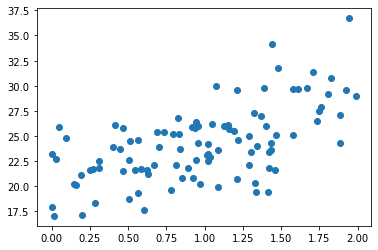

In [16]:
plt.scatter(x, y_train)
plt.show()

그래프를 그려 확인한다.

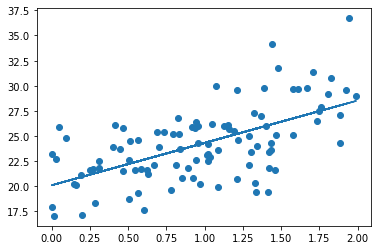

In [17]:
plt.plot(x, x_train@W)
plt.scatter(x, y_train)
plt.show()

W의 값을 확인한다.
이때 W의 0번째 원소는 가중치, 1번째 원소는 편향이다.

In [18]:
W

array([[ 4.21162657],
       [20.10162558]])